<a href="https://colab.research.google.com/github/leehg9805/S-W-/blob/main/22_08_24_%EC%98%B7_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [4]:
!kaggle datasets download -d airplane2230/apparel-image-dataset-2

100% 249M/249M [00:01<00:00, 225MB/s]
100% 249M/249M [00:01<00:00, 207MB/s]


In [5]:
import os
import zipfile
os.mkdir('/content/csv_data')

In [7]:
with zipfile.ZipFile('/content/apparel-image-dataset-2.zip', 'r') as existing_zip:

  existing_zip.extractall('/content/csv_data/nocolorinfo')

In [8]:
import pandas as pd

DATA_PATH = '/content/csv_data/nocolorinfo'

train_df = pd.read_csv(DATA_PATH +'/train.csv')
val_df = pd.read_csv(DATA_PATH +'/val.csv')
test_df = pd.read_csv(DATA_PATH +'/test.csv')

train_df['image'] = DATA_PATH + train_df['image'].apply(lambda x: str(x). replace('\\','/')[1: ])
val_df['image'] = DATA_PATH + val_df['image'].apply(lambda x: str(x). replace('\\','/')[1: ])
test_df['image'] = DATA_PATH + test_df['image'].apply(lambda x: str(x). replace('\\','/')[1: ])

del train_df['Unnamed: 0']
train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


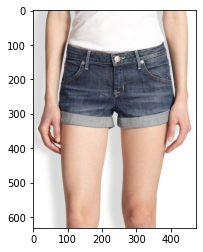

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread(train_df.iloc[0]['image'])
plt.imshow(img)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale= 1./255)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape = (112, 112, 3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(11, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [21]:
batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white',
             'dress', 'shirt', 'pants', 'shorts', 'shoes']

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory='',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode = 'rgb',
    class_mode = 'raw',
    batch_size = batch_size,
    shuffle = True,
    seed=42)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = '',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [24]:
def get_steps(num_samples, batch_size):
  if(num_samples % batch_size) > 0:
    return(num_samples // batch_size) +1
  else :
    return num_samples // batch_size

In [27]:
history = model.fit(train_generator,
                    steps_per_epoch = get_steps(len(train_df), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_steps(len(val_df), batch_size),
                    epochs = 10)

Epoch 1/10
175/175 [==============================] - 37s 207ms/step - loss: 0.6502 - acc: 0.3069 - val_loss: 0.3121 - val_acc: 0.4350
Epoch 2/10
175/175 [==============================] - 40s 226ms/step - loss: 0.3317 - acc: 0.4018 - val_loss: 0.3189 - val_acc: 0.3283
Epoch 3/10
175/175 [==============================] - 36s 205ms/step - loss: 0.2641 - acc: 0.4591 - val_loss: 0.2516 - val_acc: 0.4743
Epoch 4/10
175/175 [==============================] - 35s 200ms/step - loss: 0.2425 - acc: 0.4935 - val_loss: 0.3183 - val_acc: 0.4755
Epoch 5/10
175/175 [==============================] - 36s 208ms/step - loss: 0.2186 - acc: 0.5151 - val_loss: 0.2775 - val_acc: 0.4517
Epoch 6/10
175/175 [==============================] - 36s 204ms/step - loss: 0.2024 - acc: 0.5371 - val_loss: 0.2420 - val_acc: 0.5588
Epoch 7/10
175/175 [==============================] - 35s 202ms/step - loss: 0.1885 - acc: 0.5506 - val_loss: 0.2128 - val_acc: 0.5968
Epoch 8/10
175/175 [==============================] - 3

In [28]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = train_datagen.flow_from_dataframe(
    dataframe = test_df,
    directory=None,
    x_col = 'image',
    y_col = None,
    target_size = (112, 112),
    color_mode = 'rgb',
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)

Found 3416 validated image filenames.


In [29]:
preds = model.predict(test_generator,
                      steps = get_steps(len(test_df), batch_size),
                      verbose=1)

107/107 [==============================] - 16s 150ms/step


In [30]:
preds.shape

(3416, 11)

In [32]:
preds[0]

array([3.7137866e-03, 2.2093713e-02, 1.6398132e-03, 4.0353537e-03,
       1.3222992e-03, 1.2381402e-01, 4.3255389e-03, 1.2080841e-07,
       9.0139598e-01, 9.0988427e-02, 8.7698191e-01], dtype=float32)

In [38]:
prob = zip(class_col, list(preds[1]))
prob

In [39]:
sorted(list(prob), key = lambda z: z[1], reverse = True)

[('pants', 0.99983615),
 ('black', 0.7378695),
 ('blue', 0.014844745),
 ('shorts', 0.01218605),
 ('brown', 0.012018025),
 ('shoes', 0.0072369874),
 ('green', 0.0034329295),
 ('dress', 0.000474751),
 ('red', 7.3696916e-05),
 ('shirt', 1.2046488e-05),
 ('white', 1.1654908e-05)]

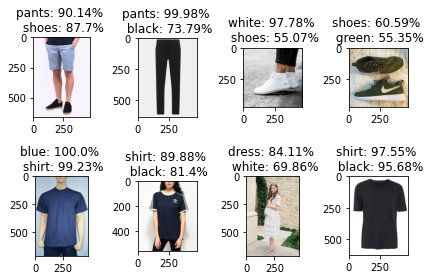

In [40]:
import cv2
do_preds = preds[:8]

for i, pred in enumerate(do_preds):
  plt.subplot(2, 4, i + 1)
  prob = zip(class_col, list(pred))
  prob = sorted(list(prob), key = lambda z:z[1], reverse = True)[:2]

  image = cv2.imread(test_df['image'][i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.imshow(image)
  plt.title(f'{prob[0][0]}: {round(prob[0][1] *100, 2)}% \n {prob[1][0]}: {round(prob[1][1] *100, 2)}%')

plt.tight_layout()